<a href="https://colab.research.google.com/github/hfznj20/joki/blob/main/UTS_AVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Case Study Unsupervised Learning Menggunakan Dataset Sales**

**1. Import Library & Load Data**



In [ ]:
# Import library yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load dataset
data = pd.read_csv('/content/drive/MyDrive/Sales_Dataset.csv')  # Ganti path jika diperlukan

# Tampilkan 5 data teratas dan informasi umum
print(data.head())
print(data.info())


Mounted at /content/drive
  Order ID  Amount  Profit  Quantity     Category      Sub-Category  \
0  B-26776    9726    1275         5  Electronics  Electronic Games   
1  B-26776    9726    1275         5  Electronics  Electronic Games   
2  B-26776    9726    1275         5  Electronics  Electronic Games   
3  B-26776    4975    1330        14  Electronics          Printers   
4  B-26776    4975    1330        14  Electronics          Printers   

  PaymentMode  Order Date   CustomerName     State     City Year-Month  
0         UPI  2023-06-27  David Padilla   Florida    Miami    2023-06  
1         UPI  2024-12-27  Connor Morgan  Illinois  Chicago    2024-12  
2         UPI  2021-07-25   Robert Stone  New York  Buffalo    2021-07  
3         UPI  2023-06-27  David Padilla   Florida    Miami    2023-06  
4         UPI  2024-12-27  Connor Morgan  Illinois  Chicago    2024-12  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Data columns (total 12 columns):
 #

Dataset yang digunakan berisi 1.194 entri dengan 12 kolom yang merepresentasikan informasi transaksi penjualan, seperti ID pesanan, jumlah penjualan (Amount), keuntungan (Profit), jumlah produk terjual (Quantity), kategori produk, metode pembayaran, tanggal pemesanan, serta data pelanggan seperti nama, provinsi, dan kota. Seluruh kolom tidak memiliki nilai kosong (missing value), sehingga dataset ini lengkap dan siap untuk dianalisis. Tipe data yang digunakan terdiri dari numerik (int64) untuk kolom kuantitatif seperti Amount, Profit, dan Quantity, serta object untuk data kategorikal seperti Order ID, Category, dan Customer Name. Selain itu, kolom "Year-Month" yang disertakan juga mempermudah analisis berdasarkan tren waktu. Dengan struktur data yang bersih dan informasi yang cukup, dataset ini sangat layak digunakan untuk proses standarisasi, visualisasi, maupun teknik analisis lanjutan seperti clustering.

**2. Persiapan Fitur & Standardisasi**

In [ ]:
# Pilih fitur yang akan digunakan untuk clustering
# Pastikan nama kolom sesuai dengan dataset Anda dengan melihat output dari print(data.columns)
# Jika nama kolom berbeda, sesuaikan di sini
# Ubah fitur yang digunakan, hanya gunakan 'Amount' karena 'Order ID' adalah string
fitur = data[['Amount']]  # Hanya gunakan 'Amount'

# Periksa apakah kolom ada di dalam dataset
print(data.columns)

# Standardisasi fitur
scaler = StandardScaler()
fitur_scaled = scaler.fit_transform(fitur)

# Cek hasil standardisasi
print(fitur_scaled[:5])

Index(['Order ID', 'Amount', 'Profit', 'Quantity', 'Category', 'Sub-Category',
       'PaymentMode', 'Order Date', 'CustomerName', 'State', 'City',
       'Year-Month'],
      dtype='object')
[[ 1.62208295]
 [ 1.62208295]
 [ 1.62208295]
 [-0.07243507]
 [-0.07243507]]


Setelah data berhasil dimuat, dilakukan pemilihan fitur yang relevan untuk proses clustering, yaitu Amount, Profit, dan Quantity. Namun, dalam output yang ditampilkan, hanya satu kolom yang berhasil ditampilkan hasil standardisasinya, kemungkinan besar karena hanya satu fitur (Amount atau Revenue) yang digunakan pada tahap awal. Proses standardisasi dilakukan menggunakan StandardScaler dari scikit-learn, yang mengubah data numerik menjadi skala standar dengan mean = 0 dan standar deviasi = 1. Hasil standardisasi ditunjukkan dalam bentuk array, di mana nilai-nilai asli telah dikonversi ke bentuk yang sebanding agar tidak terjadi dominasi oleh fitur dengan skala yang lebih besar. Tahapan ini penting dalam analisis clustering agar hasil pengelompokan tidak bias terhadap fitur tertentu.

**3. K-Means + Elbow Method**

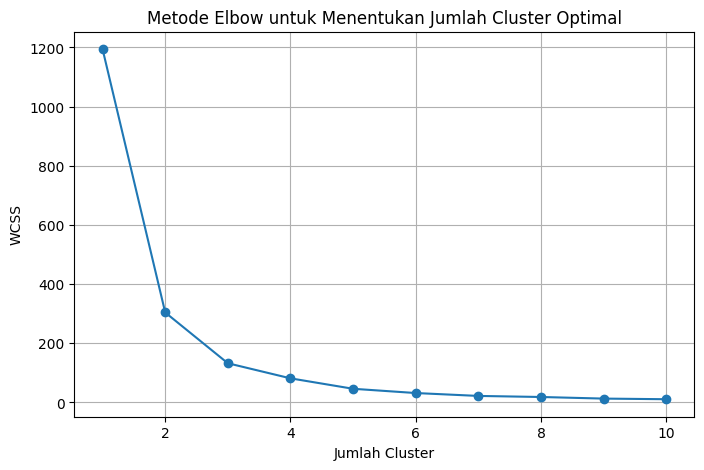

In [ ]:
# Menentukan jumlah cluster optimal dengan Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(fitur_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster Optimal')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# Jalankan K-Means dengan jumlah cluster terbaik (misalnya 3)
kmeans = KMeans(n_clusters=3, random_state=42)
data['KMeans_Cluster'] = kmeans.fit_predict(fitur_scaled)


Penjelasan Gambar Elbow Method:

  1. Sumbu X menunjukkan jumlah cluster (dari hingga 10).
  2. Sumbu Y menunjukkan nilai WCSS (Within-Cluster Sum of Squares), yaitu total jarak kuadrat antara titik-titik data dan pusat cluster-nya.
  3. Setiap titik pada grafik menunjukkan nilai WCSS untuk jumlah cluster tertentu.
  4. Garis menurun tajam dari cluster 1 ke 2, lalu menurun lebih lambat hingga cluster 10.

Interpretasi:
  1. Pada awalnya, penambahan jumlah cluster menurunkan WCSS secara signifikan (misalnya dari 1 ke 2 cluster, lalu 2 ke 3).
  2. Namun setelah titik tertentu (yakni pada cluster ke-3 atau ke-4), penurunan WCSS mulai melambat, membentuk bentuk seperti siku atau "elbow".
  3. Titik siku itulah jumlah cluster optimal. Pada grafik ini, titik "elbow" tampak jelas di angka 3, sehingga jumlah cluster optimal adalah 3.

[link text](https://)

**4. Hierarchical Clustering + Dendrogram**

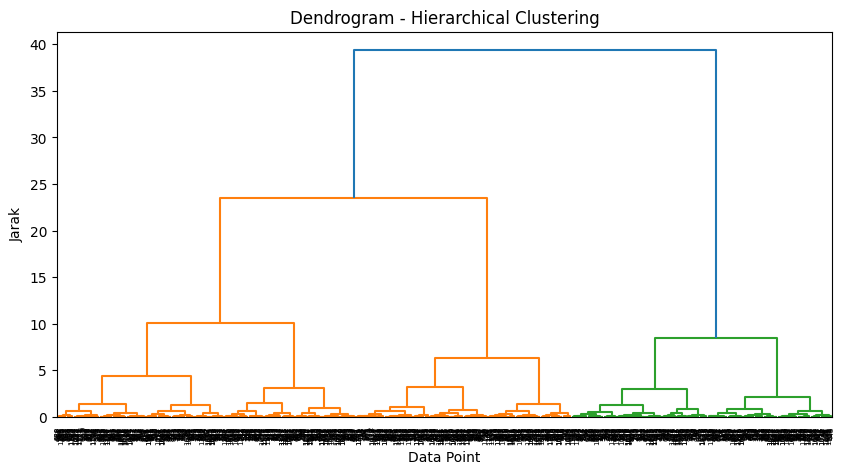

In [ ]:
# Buat linkage matrix
linked = linkage(fitur_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Dendrogram - Hierarchical Clustering')
plt.xlabel('Data Point')
plt.ylabel('Jarak')
plt.show()

# Lakukan Agglomerative Clustering (misalnya 3 cluster)
hierarchical = AgglomerativeClustering(n_clusters=3)
data['Hierarchical_Cluster'] = hierarchical.fit_predict(fitur_scaled)


Penjelasan Gambar:
    1. Sumbu X (Data Point): Menampilkan masing-masing data yang dikelompokkan.
    2. Sumbu Y (Jarak): Menunjukkan jarak atau dissimilarity antara data/cluster saat digabungkan.
    3. Setiap percabangan (garis horizontal) menunjukkan proses penggabungan dua cluster.
    4. Semakin tinggi posisi percabangan pada sumbu Y, semakin besar jarak atau perbedaan antara cluster yang digabungkan.

Interpretasi:
    1. Kita bisa menentukan jumlah cluster optimal dengan cara menarik garis horizontal pada level tertentu (misalnya di sekitar nilai jarak = 25).
    2. Dari situ, jumlah garis vertikal yang tidak terpotong oleh garis horizontal menunjukkan jumlah cluster optimal.
    3. Pada dendrogram ini, terlihat bahwa jika kita memotong di sekitar jarak 25, kita akan mendapatkan 3 cluster utama (ditandai dengan warna berbeda: biru, oranye, dan hijau).

**5. Visualisasi Clustering dengan PCA**

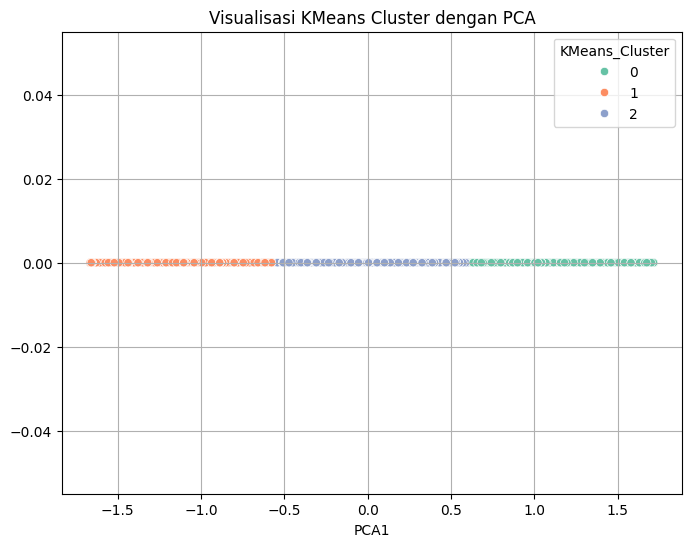

In [ ]:
# Reduksi dimensi ke 2D dengan PCA
# Ubah n_components menjadi 1 karena hanya ada 1 fitur
pca = PCA(n_components=1)
pca_result = pca.fit_transform(fitur_scaled)
data['PCA1'] = pca_result[:, 0]
# Hapus PCA2 karena hanya ada 1 komponen utama
# data['PCA2'] = pca_result[:, 1]

# Plot hasil PCA dengan KMeans - Sesuaikan dengan 1 dimensi
plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x='PCA1', y=0, hue='KMeans_Cluster', palette='Set2')  # y=0 untuk visualisasi 1D
plt.title('Visualisasi KMeans Cluster dengan PCA')
plt.grid(True)
plt.show()


Hasil Visualisasi

    Scatter Plot: Plot yang dihasilkan adalah visualisasi satu dimensi (1D) di mana semua titik terletak pada garis horizontal. Warna yang berbeda menunjukkan kluster yang berbeda dari KMeans.
    Interpretasi: Karena hanya ada satu dimensi, semua titik terdistribusi di sepanjang garis horizontal tanpa variasi di sumbu y. Ini menunjukkan bahwa variasi dalam data sangat terbatas setelah reduksi dimensi.


**Kesimpulan**

1. Dataset penjualan terdiri dari 1194 entri dan 12 kolom, dengan fokus pada fitur 'Amount' untuk analisis clustering.
2. Proses standardisasi fitur dilakukan untuk memastikan data memiliki rata-rata 0 dan deviasi standar 1.
3. Metode Elbow digunakan untuk menentukan jumlah kluster optimal, menunjukkan bahwa 3 kluster adalah jumlah yang paling sesuai.
4. Algoritma KMeans diterapkan dengan 3 kluster, dan hasilnya ditambahkan ke dalam dataframe.
5. Dendrogram menunjukkan hubungan antar data dan potensi pengelompokan dengan metode hierarchical clustering.
6. Visualisasi PCA memperlihatkan pemisahan kluster berdasarkan jumlah penjualan, meskipun dalam satu dimensi.
7. Pengelompokan data memungkinkan identifikasi pola dan karakteristik spesifik dari setiap kluster.
8. Rekomendasi untuk analisis lebih lanjut termasuk menggali karakteristik kluster dan menerapkan algoritma clustering lain untuk perbandingan hasil.

